## PES Analysis - Messi

In this analysis, I will evaluate how different factors affect the overall rating across different levels of one player.

I chose Messi because he is my favorite soccer player.

In [20]:
# I will set up everything by importing packages and data first.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# packages for building up models
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

# packages for testing models
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

df = pd.read_excel(r'C:\Users\qiuwk\Google Drive\Projects\PES\PES_Messi.xlsx', index_col =0 )

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 19
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Height               19 non-null     int64 
 1   Weight               19 non-null     int64 
 2   Age                  19 non-null     int64 
 3   Position             19 non-null     object
 4   Offensive Awareness  19 non-null     int64 
 5   Ball Control         19 non-null     int64 
 6   Dribbling            19 non-null     int64 
 7   Tight Possession     19 non-null     int64 
 8   Low Pass             19 non-null     int64 
 9   Lofted Pass          19 non-null     int64 
 10  Finishing            19 non-null     int64 
 11  Heading              19 non-null     int64 
 12  Place Kicking        19 non-null     int64 
 13  Curl                 19 non-null     int64 
 14  Speed                19 non-null     int64 
 15  Acceleration         19 non-null     int64 
 16  Kicking Po

# Visualization of all the factors

C:\Users\qiuwk\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


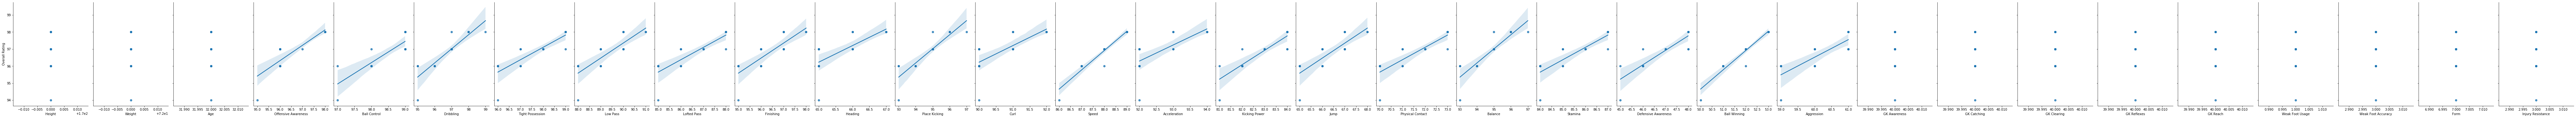

In [21]:
sns.pairplot(df, x_vars=['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                           'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                           'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression','GK Awareness',
                           'GK Catching','GK Clearing','GK Reflexes','GK Reach','Weak Foot Usage','Weak Foot Accuracy','Form',
                           'Injury Resistance'], y_vars='Overall Rating',kind="reg", size=5, aspect=0.7)

We can see that 
'Height', 'Weight','Age', 'GK Awareness',  'GK Catching', 'GK Clearing', 'GK Reflexes', 'GK Reach', 'Weak Foot Usage', 
'Weak Foot Accuracy', 'Form', 'Injury Resistance' do not change even when Messi gets a level up.

So, we can focus on the other factors on this model.

C:\Users\qiuwk\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


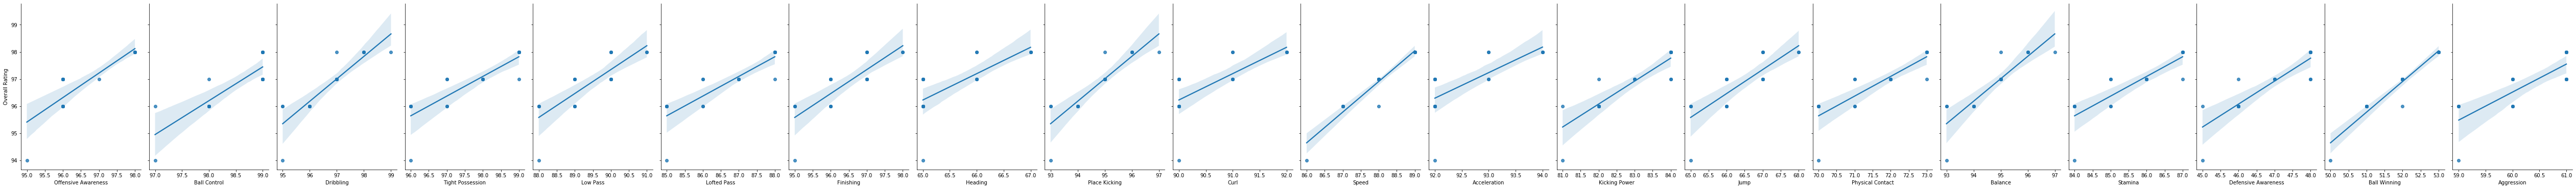

In [22]:
sns.pairplot(df, x_vars=['Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                           'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                           'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression'], 
             y_vars='Overall Rating',kind="reg", size=5, aspect=0.7)

In [23]:
X=df.loc[:,('Offensive Awareness','Ball Control','Dribbling','Tight Possession', 
                           'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                           'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression')]

y=df.loc[:,'Overall Rating']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(11, 20)
 y_train.shape =(11,)
 X_test.shape=(8, 20)
,  y_test.shape=(8,)


In [24]:
# Try to create a dictionary to store the model
messi_model = {}

messi_model.update({'intercept': linreg.intercept_})

for i in variables:
    messi_model.update({i:linreg.coef_[variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
table = pd.DataFrame.from_dict(messi_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
table['Without Intercept (OLS Result)'] = model.params
table.fillna(0,inplace = True)

table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,1.428571e-01,0.000000
Offensive Awareness,1.000000e+00,1.000000
Ball Control,2.857143e-01,0.286716
Dribbling,-7.836138e-16,0.000029
Tight Possession,6.422023e-16,0.000268
Low Pass,2.681942e-16,0.000246
Lofted Pass,-1.904650e-16,0.000027
Finishing,-2.591617e-16,0.000400
Heading,3.144154e-16,-0.000274
Place Kicking,7.680905e-17,-0.000015


In [25]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv = 3))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))

MAE for the intercept-included model is: 0.5000000000000071
MSE for the intercept-included model is: 0.4744897959183561
R-squre for the intercept-included model is: 0.3098330241187548
CV score for the intercept-included model is:
[0.34909131 0.72432783 0.33094663]

MAE for the intercept-excluded model is: 0.50009720133143
MSE for the intercept-excluded model is: 0.4744363153120479
R-squre for the intercept-excluded model is: 0.30991081409156673


# Conclusion

__With the R-square score and the MAE, I would say that this model is overfitting. The major reason will the limited amount of data.My recommendation will be that it is hard to analyze an individual's development through levels.__

__However, with the coefficients on the table, we can compare the values to take a look at which factors are more important than others.__

__That is all my analysis. Thank you!__